In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
census_2009 = pd.read_csv('./CSV/2009.csv')
census_2009 = census_2009.iloc[:,:-1]
tot_2009 = pd.DataFrame(census_2009.sum(numeric_only=True)).T
tot_2009.index = ["2009"]

In [10]:
census_2015 = pd.read_csv('./CSV/2015.csv')
census_2015 = census_2015.iloc[:,:-1]
tot_2015 = pd.DataFrame(census_2015.sum(numeric_only=True)).T
tot_2015.index = ["2015"]

In [11]:
combined = tot_2009.append(tot_2015).T
combined.index.name = 'Language'

In [12]:
combined['Change'] = combined['2015'] - combined['2009']
combined['Percentage'] = combined['Change']/combined['2009']*100
combined_sorted = combined.sort_values(["Percentage"], ascending = False)
combined_sorted.to_csv("NetChange.csv", index = True, header = True)

In [13]:
combined_styled = combined_sorted.style.format({"2009":"{:,.0f}","2015":"{:,.0f}","Change":"{:,.0f}","Percentage":"{:.2f}%"})

In [14]:
combined_sorted.head()

,2009,2015,Change,Percentage
Language,,,,
Hindi,520401.0,713186.0,192785.0,37.045471
Arabic,755979.0,1035578.0,279599.0,36.985022
Urdu,329511.0,429352.0,99841.0,30.299747
French Creole,612910.0,786770.0,173860.0,28.366318
Gujarati,305158.0,385948.0,80790.0,26.474810


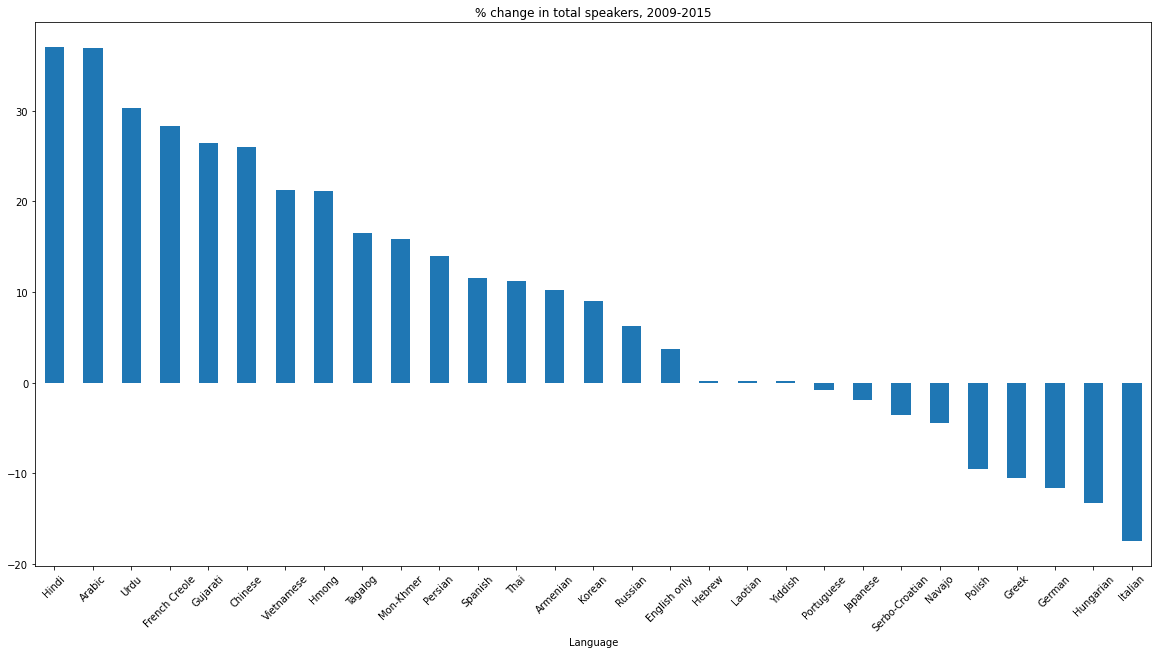

In [15]:
combined_sorted['Percentage'].plot(kind='bar', rot=45, figsize=(20,10), title="% change in total speakers, 2009-2015")

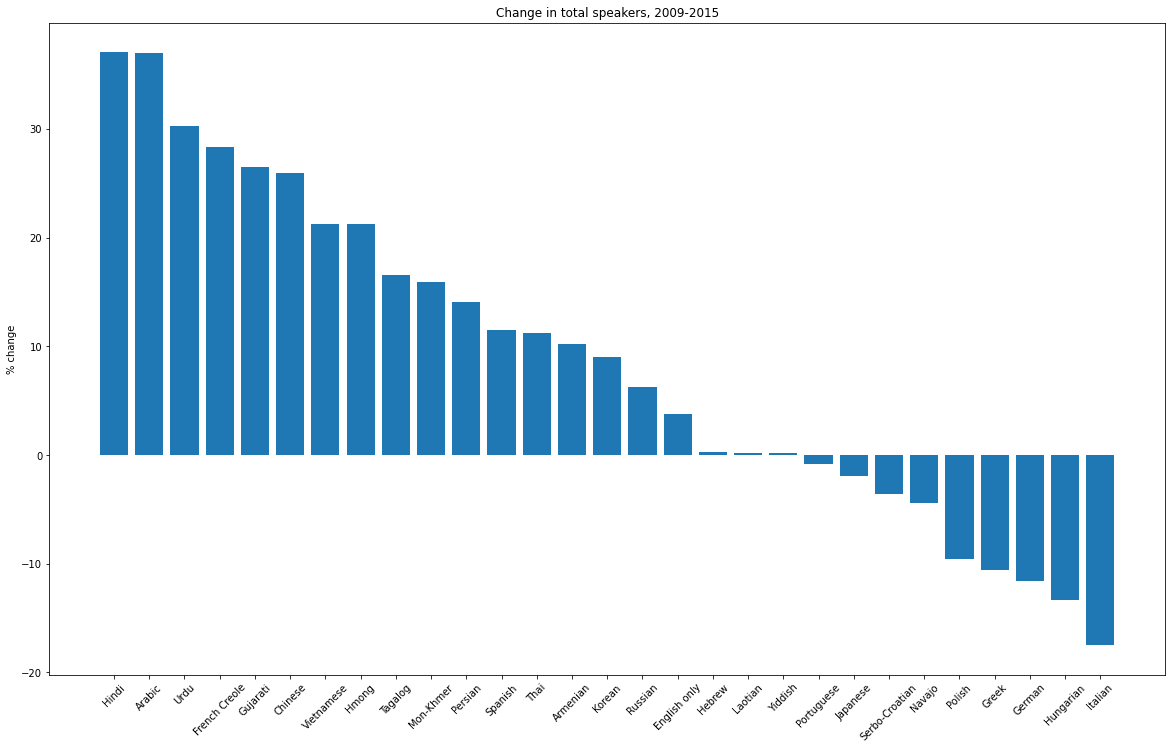

In [16]:
plt.figure(figsize=(20, 12))
plt.bar(combined_sorted.index,combined_sorted['Percentage'])
plt.xticks(rotation=45)
plt.title("Change in total speakers, 2009-2015")
plt.ylabel("% change")
plt.rc('figure',titlesize=20)
plt.rc('xtick', labelsize=12) 
plt.savefig("NetChange.png")
plt.show()

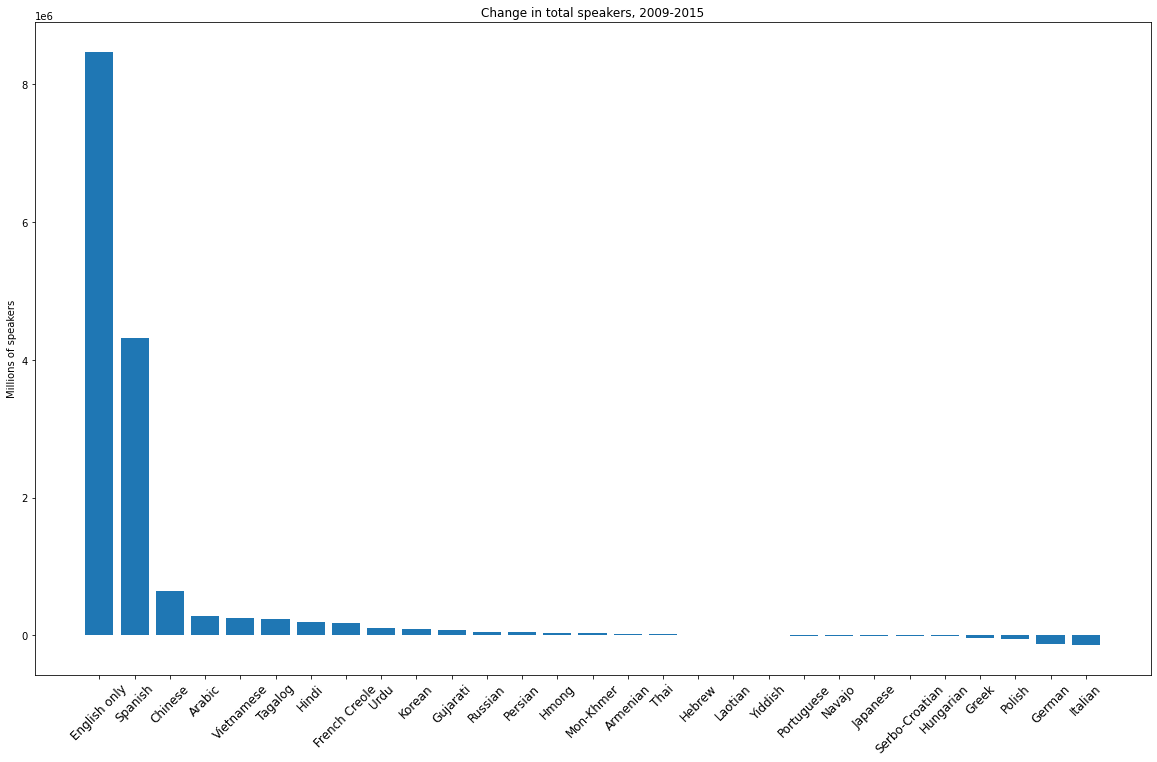

In [19]:
combined_sorted = combined.sort_values(["Change"], ascending = False)
plt.figure(figsize=(20, 12))
plt.bar(combined_sorted.index,combined_sorted['Change'])
plt.xticks(rotation=45)
plt.title("Change in total speakers, 2009-2015")
plt.ylabel("Millions of speakers")
plt.rc('figure',titlesize=20)
plt.rc('xtick', labelsize=12) 
plt.savefig("./PNG/AbsoluteChange.png")
plt.show()